## Exploratory Data Analysis on Vaccination drive in India.
### The project is done by Nilabja Ghosh and Udvas Das and was given to us by Dr. Sudeep Mallick.

In [1]:
# importing all the neccesary packages into the python enviornment 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
import re
%matplotlib inline

## Data handling and data cleaning

In [2]:
# reading the csv file containing all the data
data = pd.read_csv("Vaccination.csv")
data.head()

,Timestamp,What is your age group?,What is your gender?,In which type of area do you live?,Do you think Vaccination is safe?,What is your vaccination status?,Did you have to travel somewhere else other than your hometown to get the vaccine jabs?,"Considering you have access to all these vaccines, rank them according to your personal preference (On the basis of their reliability) [First choice]","Considering you have access to all these vaccines, rank them according to your personal preference (On the basis of their reliability) [Second choice]","Considering you have access to all these vaccines, rank them according to your personal preference (On the basis of their reliability) [Third choice]",...,"Considering you have access to all these vaccines, rank them according to your personal preference (On the basis of their reliability) [Sixth choice]",Which brand of vaccine did you actually get?,Which type of vaccine do you think is more reliable?,"Did you use the CoWin portal to book slots? If yes, had you faced difficulties using it?",How easy it was for you to book an appointment for your vaccination?,How much time you waited in queue at the vaccination centre to get your vaccine?,How much satisfied were you regarding the social distancing maintained at your vaccination centre?,How much satisfied were you regarding the hygiene maintained at your vaccination centre?,"Did you face any post vaccination symptoms like fever, body ache etc? If yes, which vaccine dose caused more health issues(mentioned above)?",Rate your Government's effort to supply enough vaccines to meet the demand for the vaccine drive?
0,08-10-2021 00:59,18-25,Female,Small town,Yes,Both doses taken,No,Covishield,CoVaxin,Sputnik,...,Moderna,Covishield,Paid vaccines offered by private organizations,"Yes, I faced a lot of issues while booking",3,1 - 2 hours,1,2,After both doses,2
1,18-10-2021 21:38,18-25,Female,Small town,Yes,Both doses taken,No,Moderna,Pfizer,Sputnik,...,AstraZeneca,Covishield,Free vaccines offered by the Government,"No, I have not used the portal",4,1 - 2 hours,1,2,After 1st dose,3
2,18-10-2021 21:56,18-25,Male,Metropolitan cities,Yes,Both doses taken,Yes,Pfizer,AstraZeneca,Covishield,...,Moderna,Covishield,Free vaccines offered by the Government,"Yes, I faced a lot of issues while booking",2,> 2 hours,3,3,After 1st dose,3
3,18-10-2021 22:29,18-25,Female,Small town,Yes,Both doses taken,No,Covishield,CoVaxin,AstraZeneca,...,Moderna,Covishield,Free vaccines offered by the Government,"Yes, I faced a lot of issues while booking",3,> 2 hours,3,3,After 1st dose,4
4,18-10-2021 22:31,18-25,Female,Metropolitan cities,Not sure,Both doses taken,No,Covishield,CoVaxin,Sputnik,...,AstraZeneca,CoVaxin,Free vaccines offered by the Government,"Yes, but I did not face any problem",4,< half hour,3,3,After both doses,3


## Changing the column names to something more short and usable for future use.

### NOTE we are removing the age-group of 0-17 due to lack of adequete number of data points.

In [3]:
data.columns = ["TimeStamp","Age","Gender","Living_area","Vac_safe","Vac_status","Travel","1st_choice",
                "2nd_choice","3rd_choice","4th_choice","5th_choice","6th_choice","Vac_brand","Vac_reliable",
                "CoWin","Vac_app_easy","waiting_time","Social_dis","Hygiene","Vac_symptom","Govt_effort"]
data = data[data["Age"]!='0-17']
data.head()

,TimeStamp,Age,Gender,Living_area,Vac_safe,Vac_status,Travel,1st_choice,2nd_choice,3rd_choice,...,6th_choice,Vac_brand,Vac_reliable,CoWin,Vac_app_easy,waiting_time,Social_dis,Hygiene,Vac_symptom,Govt_effort
0,08-10-2021 00:59,18-25,Female,Small town,Yes,Both doses taken,No,Covishield,CoVaxin,Sputnik,...,Moderna,Covishield,Paid vaccines offered by private organizations,"Yes, I faced a lot of issues while booking",3,1 - 2 hours,1,2,After both doses,2
1,18-10-2021 21:38,18-25,Female,Small town,Yes,Both doses taken,No,Moderna,Pfizer,Sputnik,...,AstraZeneca,Covishield,Free vaccines offered by the Government,"No, I have not used the portal",4,1 - 2 hours,1,2,After 1st dose,3
2,18-10-2021 21:56,18-25,Male,Metropolitan cities,Yes,Both doses taken,Yes,Pfizer,AstraZeneca,Covishield,...,Moderna,Covishield,Free vaccines offered by the Government,"Yes, I faced a lot of issues while booking",2,> 2 hours,3,3,After 1st dose,3
3,18-10-2021 22:29,18-25,Female,Small town,Yes,Both doses taken,No,Covishield,CoVaxin,AstraZeneca,...,Moderna,Covishield,Free vaccines offered by the Government,"Yes, I faced a lot of issues while booking",3,> 2 hours,3,3,After 1st dose,4
4,18-10-2021 22:31,18-25,Female,Metropolitan cities,Not sure,Both doses taken,No,Covishield,CoVaxin,Sputnik,...,AstraZeneca,CoVaxin,Free vaccines offered by the Government,"Yes, but I did not face any problem",4,< half hour,3,3,After both doses,3


In [4]:
age_count = pd.DataFrame(data["Age"].value_counts());print(age_count) 
# counting the total number of data points in each age group.
living_area_count = pd.DataFrame(data["Living_area"].value_counts());print(living_area_count)
# counting the total number of data points in each age group.
gen_count = pd.DataFrame(data["Gender"].value_counts());print(gen_count)
# counting the number of individual in each gender
travel_count = pd.DataFrame(data["Travel"].value_counts());print(travel_count)
# counting the total number of people who had to travel and who hadn't

          Age
18-25      99
26-35      12
45 above   11
36-45       8
                     Living_area
Small town                    78
Metropolitan cities           36
Rural                         16
        Gender
Male        80
Female      50
     Travel
No      105
Yes      25


## Demographic visualization

Text(0.5, 1.0, 'Proportion of people living in different area')

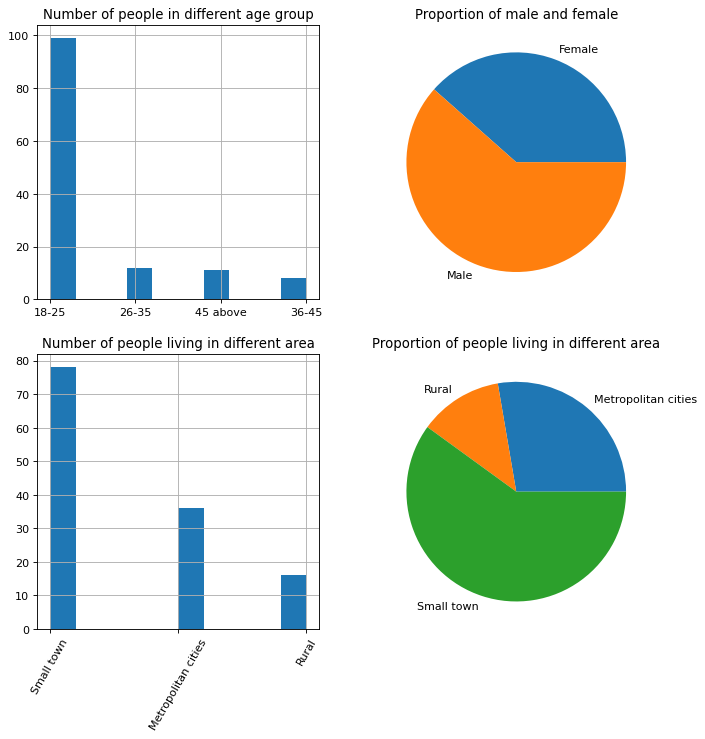

In [5]:
# DEMOGRAPHICAL VISUALIZATION
fig = plt.figure(figsize=(10, 10), dpi=80)
sub_plot1 = fig.add_subplot(2,2,1)
data.Age.hist() 
# histogram for the number of people in each age group
plt.xticks(rotation=0)
plt.title("Number of people in different age group")
#plt.bar(data.Age, height =1)

sub_plot2 = fig.add_subplot(2,2,2)
df = data.groupby(['Gender']).count()
plt.pie(df.Age,labels = ['Female','Male'])
plt.title("Proportion of male and female")
# pie diagram showing the proportion of male and female in our data

sub_plot3 = fig.add_subplot(2,2,3)
data.Living_area.hist()
plt.xticks(rotation= 60)
plt.title("Number of people living in different area")
# bar diagram showing the number of people living in different areas
#plt.bar(data.Living_area)

sub_plot4 = fig.add_subplot(2,2,4)
df = data.groupby(['Living_area']).count()
plt.pie(df.Age, labels=['Metropolitan cities','Rural','Small town'])
# pie diagram showiing the proportion of people living in different areas
plt.title("Proportion of people living in different area")

### Number of male and female people in each age group

Text(0.5, 1.0, 'Gender compostion in different Age group')

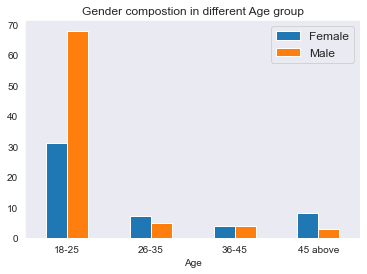

In [6]:
sns.set_style("dark")
data.groupby(['Gender','Age'])['Gender'].count().unstack('Gender').plot.bar()
plt.xticks(rotation = 0)
plt.legend(frameon = True, fontsize = "large")
plt.title("Gender compostion in different Age group")

### Number of male and female individual of different age group lives in different type of areas

Text(0.5, 1.0, 'Number of female individual in different living area')

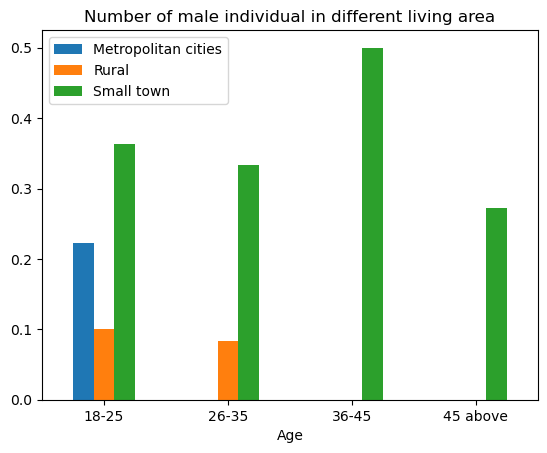

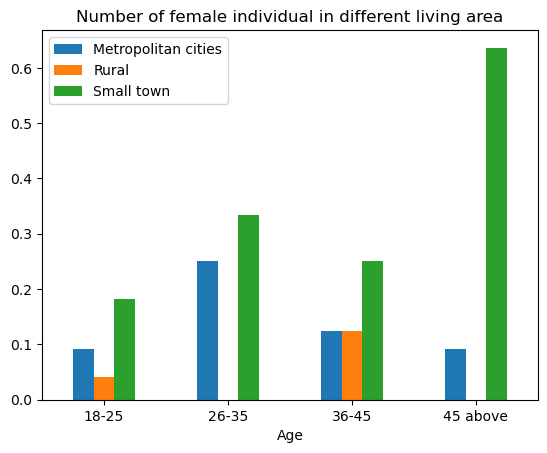

In [7]:
mpl.style.use('default')
male = data[data['Gender']=='Male'].groupby(['Living_area','Age'])["Living_area"].count().unstack('Living_area')
for i in list(male.columns):
    male[i]= male[i]/age_count.Age
male.plot.bar()
plt.legend(loc='upper left')
plt.title("Number of male individual in different living area")
# number of male individual of different age group lives in different type of areas 
plt.xticks(rotation = 0)
plt.legend(frameon = True, fontsize = "medium")


female = data[data['Gender']=='Female'].groupby(['Living_area','Age'])["Living_area"].count().unstack('Living_area')
for i in list(female.columns):
    female[i]= female[i]/age_count.Age
female.plot.bar()
plt.title("Female")
plt.legend(frameon = True, fontsize = "medium")
plt.xticks(rotation = 0)
# number of female individual of different age group lives in different type of areas 
plt.title("Number of female individual in different living area")

### Frequency density plot of the number of male and female in different age group

Text(0.5, 1.0, 'Gender compostion in diferent Age interval')

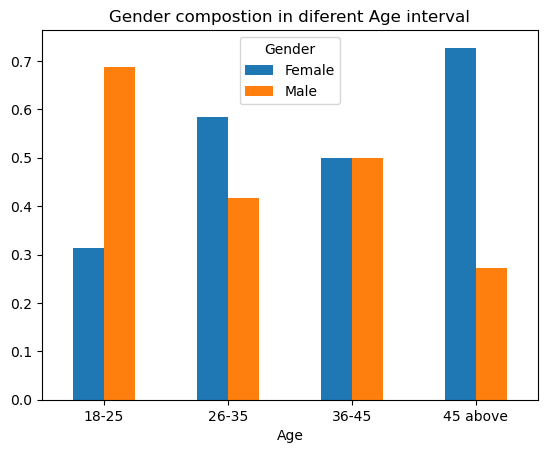

In [8]:
# frequency density of the number of male and female in different age group

demo5 = data.groupby(['Gender','Age'])["Gender"].count().unstack('Gender')
for i in list(demo5.columns):
    demo5[i]= demo5[i]/age_count.Age
demo5.plot.bar()
plt.xticks(rotation = 0)
plt.title ("Gender compostion in diferent Age interval")

## DATA VISUALIZATION

## Plot 1

### Age wise reliability on vaccine

Text(0.5, 1.0, 'Age wise Reliability on Vaccination')

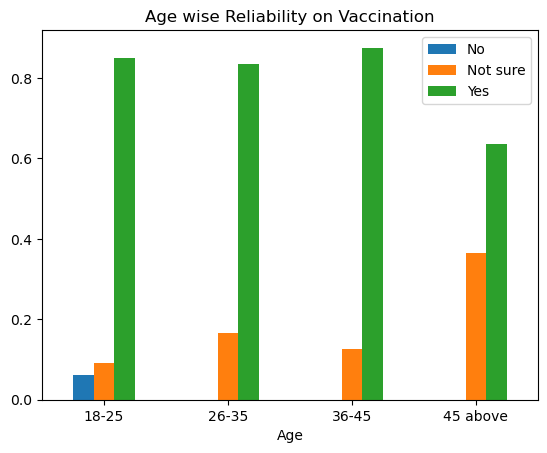

In [9]:
# Age wise reliability on vaccine

fig, axis = plt.subplots()
df1 = data.groupby(['Age','Vac_safe'])["Age"].count().unstack('Vac_safe')
for i in list(df1.columns):
    df1[i]= df1[i]/age_count.Age
# print(df1)
df1.plot(kind="bar",ax=axis,grid= False,stacked= False)
axis.legend(["No","Not sure","Yes"])
plt.xticks(rotation = 0)
plt.title ("Age wise Reliability on Vaccination")

## Plot 2

### Reliability on vaccine based on living area

Text(0.5, 1.0, 'Living area wise Reliability on Vaccination')

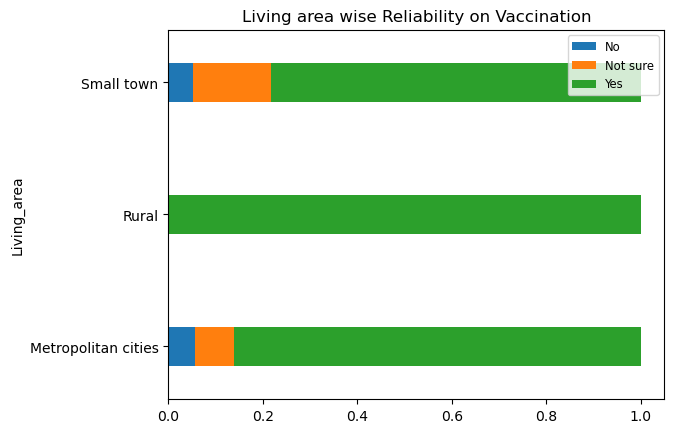

In [10]:
# reliability on vaccine based on living area

fig, axis = plt.subplots()
df2 = data.groupby(['Living_area','Vac_safe'])["Living_area"].count().unstack('Vac_safe')
for i in list(df2.columns):
    df2[i]= df2[i]/living_area_count.Living_area
# print(df2)
df2.plot(kind="barh",ax=axis, grid= False, stacked= True,width = 0.3)
axis.legend(["No","Not sure","Yes"], fontsize = "small", frameon = True)
plt.yticks(rotation = 0)
plt.title ("Living area wise Reliability on Vaccination")

## Plot 3

### Gender wise vaccine reliability

Text(0.5, 1.0, 'Gender wise Reliability on Vaccination')

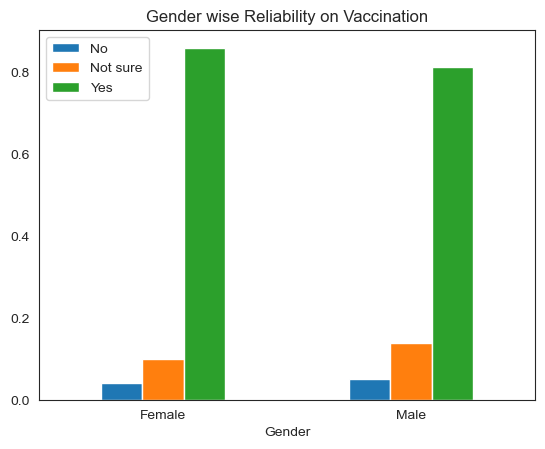

In [11]:
# gender wise vaccine reliability

# sns.set_theme("white")
sns.set_style("white")
fig, axis = plt.subplots()
df3 = data.groupby(['Gender','Vac_safe'])["Gender"].count().unstack('Vac_safe')
for i in list(df3.columns):
    df3[i]= df3[i]/gen_count.Gender
# print(df3)
df3.plot(kind="bar",ax=axis,grid= False,stacked= False)
axis.legend(["No","Not sure","Yes"])
plt.xticks(rotation = 0)
plt.title ("Gender wise Reliability on Vaccination")

## Plot 4

### Gender and age wise vaccination status 

Text(0.5, 1.0, 'Gender and Age wise Vaccination status')

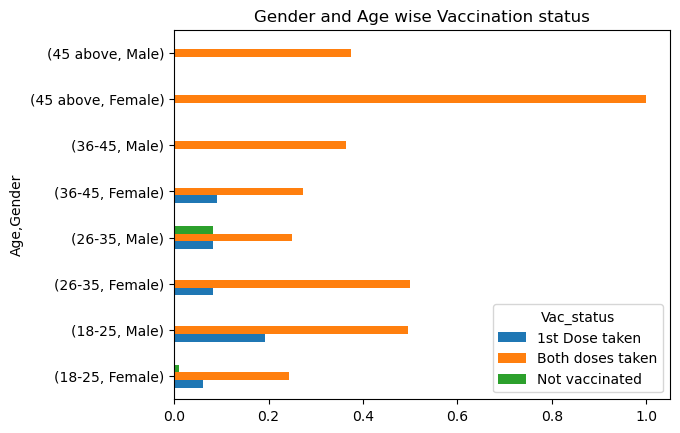

In [12]:
# Gender and age wise vaccination status 

mpl.style.use('default')
df4 = data.groupby(['Age','Gender','Vac_status'])["Age"].count().unstack('Vac_status')
def f(x,n):
    l = []
    for i in range(len(x)):
        for j in range(0,n):
            l.append(x[i])
    return l
for i in list(df4.columns):
    df4[i]= df4[i]/f(age_count["Age"],2)
df4.plot.barh()
plt.xticks(rotation = 0)
plt.title('Gender and Age wise Vaccination status')

## Plot 5

### Vaccination status wrt to the living area

Text(0.5, 1.0, 'Living-area wise Vaccination status')

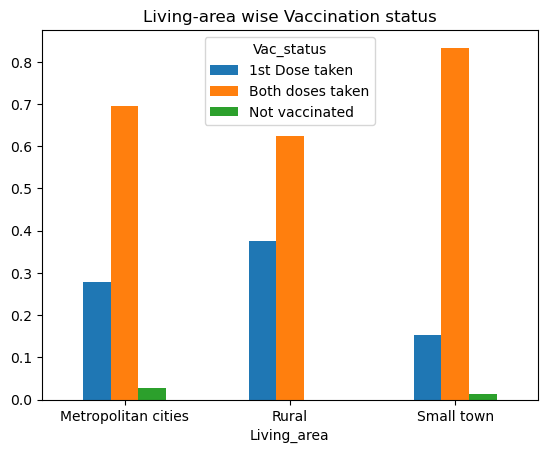

In [13]:
# Vaccination status wrt to the living area

df5 = data.groupby(['Living_area','Vac_status'])["Living_area"].count().unstack('Vac_status')
for i in list(df5.columns):
    df5[i]= df5[i]/living_area_count.Living_area
df5.plot.bar()
plt.xticks(rotation = 0)
plt.title('Living-area wise Vaccination status')

## Plot 6

### Comparison between free and paid vaccines wrt to living area

Text(0.5, 1.0, 'Reliability on vaccine provider')

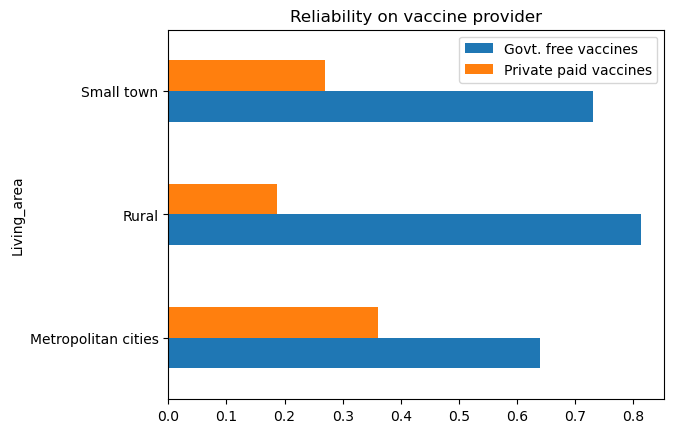

In [14]:
# Comparison between free and paid vaccines wrt to living area

fig, axis = plt.subplots()
df6 = data.groupby(['Living_area','Vac_reliable'])["Living_area"].count().unstack('Vac_reliable')
for i in list(df6.columns):
    df6[i]= df6[i]/living_area_count.Living_area
df6.plot(kind="barh",ax=axis)
axis.legend(["Govt. free vaccines","Private paid vaccines"])
plt.yticks(rotation = 0)
plt.title('Reliability on vaccine provider')

## Plot 7

### Travel status to get vaccine shot wrt to the individual living area

Text(0.5, 1.0, 'Travel to get the vaccine Living area wise')

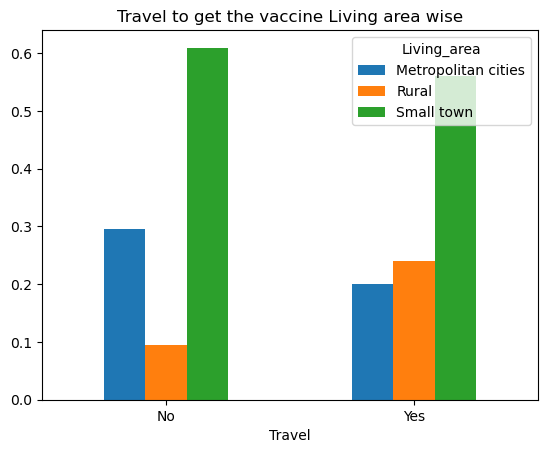

In [15]:
# travel status to get vaccine shot wrt to the individual living area

df7 = data.groupby(['Travel','Living_area'])["Travel"].count().unstack('Living_area')
for i in list(df7.columns):
    df7[i]= df7[i]/travel_count.Travel
df7.plot.bar()
plt.xticks(rotation = 0)
plt.title('Travel to get the vaccine Living area wise')

## Plot 8

### Percentage of CoWin app usage and percentage of people who faced problem while using it

In [16]:
df10 = data[["CoWin"]]
yescount = df10['CoWin'].str.contains('Yes').sum()
nocount = df10['CoWin'].str.contains('No').sum()
count = [yescount,nocount]
plabel = ["Yes","No"]
yescount1 = df10['CoWin'].str.contains('Yes, I faced a lot of issues while booking').sum()
yescount2 = df10['CoWin'].str.contains('Yes, but I did not face any problem').sum()
count1 = [yescount,nocount]
plabel1 = ["Lot of issues","No issues"]

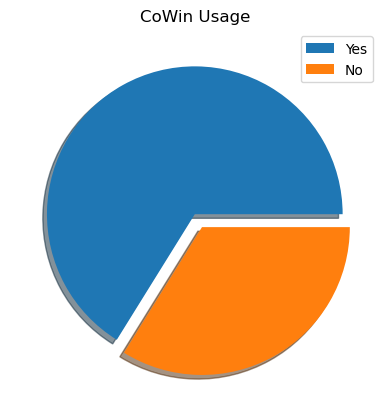

In [17]:
# proportion of cowin usage

pie, texts = plt.pie(count1,explode = [0,.1],shadow = True)
plt.title("CoWin Usage")
plt.legend(pie, plabel, loc="upper right")
plt.show()

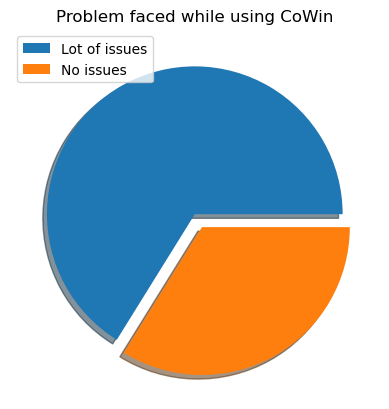

In [18]:
# problem faced while using cowin

pie1, texts1 = plt.pie(count1,explode = [0,.1],shadow = True)
plt.title("Problem faced while using CoWin")
plt.legend(pie1, plabel1, loc="upper left")
plt.show()

## Plot 9

### Age wise CoWin use

Text(0.5, 1.0, 'Cowin usage age-wise')

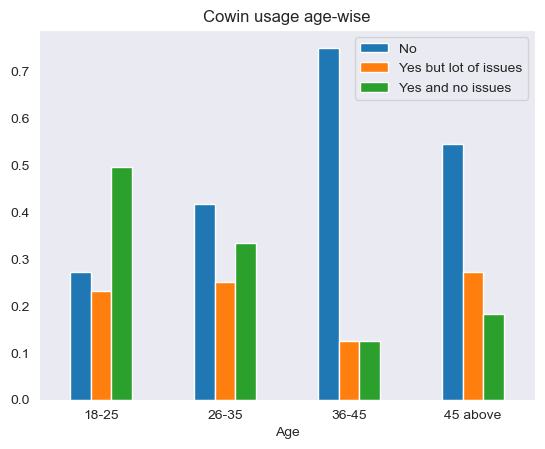

In [19]:
# Cowin usage age wise

sns.set_style("dark")
fig,axis = plt.subplots()
df8 = data.groupby(['Age','CoWin'])["Age"].count().unstack('CoWin')
# print(df8)
for i in list(df8.columns):
    df8[i]= df8[i]/age_count.Age
df8.plot(kind="bar",ax=axis)
axis.legend(["No","Yes but lot of issues","Yes and no issues"])
plt.xticks(rotation = 0)
plt.title ("Cowin usage age-wise")

## Plot 10

### Ease in getting an vaccine in relation to CoWin use

In [20]:
df100 = data[["CoWin","Vac_app_easy"]]
# df100[df100['CoWin'].str.contains('Yes')]["CoWin"] = ['Yes']
df101 = df100[df100['CoWin'].str.contains('Yes')]
df101['CoWin'] = "Yes"
df102 = df100[df100['CoWin'].str.contains('No')]
df102['CoWin'] = "No"
frame = [df101,df102]
df_final = pd.concat(frame)

<ipython-input-20-97b72b0bc04d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df101['CoWin'] = "Yes"
<ipython-input-20-97b72b0bc04d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df102['CoWin'] = "No"


Text(0.5, 1.0, 'Using CoWin portal vs ease of appointment')

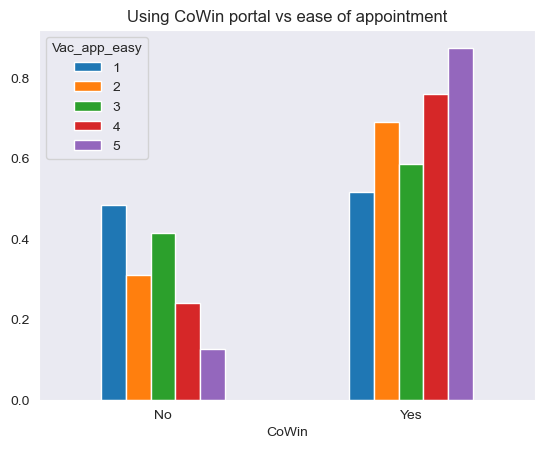

In [21]:
# Cowin app usage and ease of appointment

df50 = df_final.groupby(['CoWin','Vac_app_easy'])["Vac_app_easy"].count().unstack('Vac_app_easy')
# print(df50)
ease_count = pd.DataFrame(df_final["Vac_app_easy"].value_counts())
for i in list(df50.columns):
    df50[i]= df50[i]/ease_count.Vac_app_easy[i]
df50.plot.bar()
plt.xticks(rotation = 0)
plt.title("Using CoWin portal vs ease of appointment")

## Plot 11

### Cowin usage based on living area

Text(0.5, 1.0, 'CoWin usage living area wise')

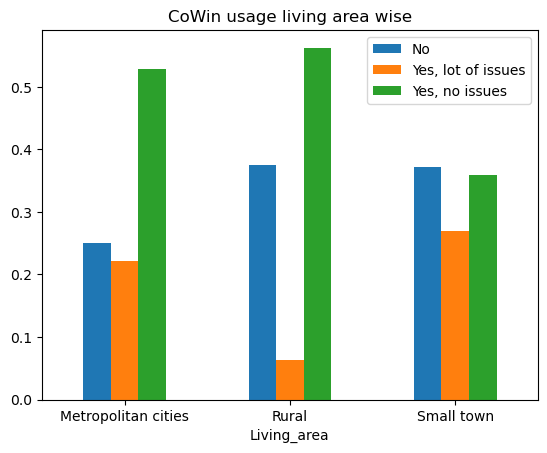

In [22]:
# Cowin usage living area wise

mpl.style.use('default')
fig,axis = plt.subplots()
df9 = data.groupby(['Living_area','CoWin'])["Living_area"].count().unstack('CoWin')
for i in list(df9.columns):
    df9[i]= df9[i]/living_area_count.Living_area
df9.plot(kind="bar",ax=axis)
axis.legend(["No","Yes, lot of issues","Yes, no issues"])
plt.xticks(rotation = 0)
plt.title("CoWin usage living area wise")

## Plot 12

### Multiple bar plot showing the vaccine preference

Text(0.5, 1.0, '6th choice')

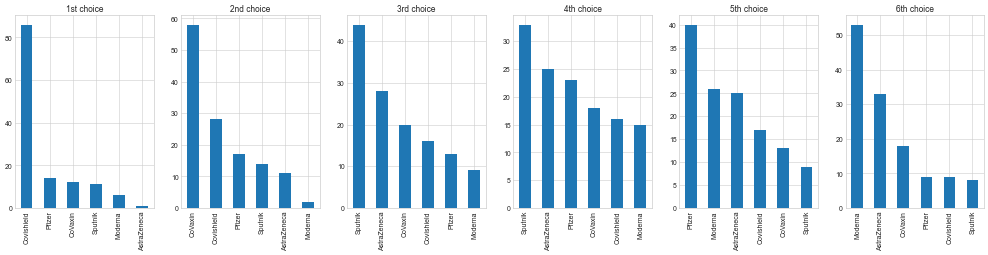

In [23]:
# multiple bar plot showing the vaccine preference

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25, 5), dpi=50)
sub_plot1 = fig.add_subplot(1,6,1)
first = data["1st_choice"].value_counts()
first.plot.bar()
plt.xticks(rotation=90)
plt.title("1st choice")
sub_plot2 = fig.add_subplot(1,6,2)
second = data["2nd_choice"].value_counts()
second.plot.bar()
plt.xticks(rotation=90)
plt.title("2nd choice")
sub_plot3 = fig.add_subplot(1,6,3)
third = data["3rd_choice"].value_counts()
third.plot.bar()
plt.xticks(rotation=90)
plt.title("3rd choice")
sub_plot4 = fig.add_subplot(1,6,4)
fourth = data["4th_choice"].value_counts()
fourth.plot.bar()
plt.xticks(rotation=90)
plt.title("4th choice")
sub_plot5 = fig.add_subplot(1,6,5)
fifth = data["5th_choice"].value_counts()
fifth.plot.bar()
plt.xticks(rotation=90)
plt.title("5th choice")
sub_plot6 = fig.add_subplot(1,6,6)
sixth = data["6th_choice"].value_counts()
sixth.plot.bar()
plt.xticks(rotation=90)
plt.title("6th choice")

## Plot 13

### Symptoms after Vaccination

Text(0.5, 1.0, 'Symptoms after vaccine')

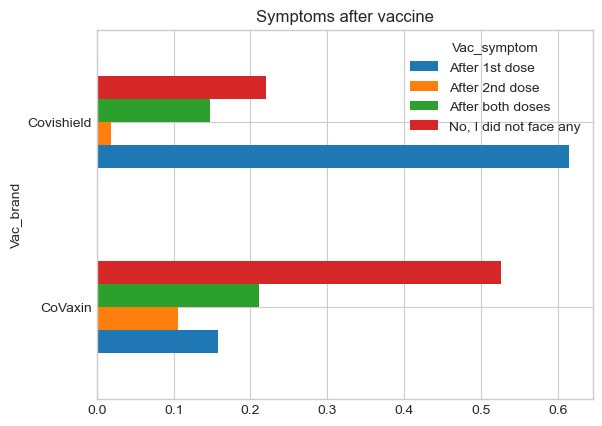

In [24]:
# Symptoms after Vaccination

plt.style.use('seaborn-whitegrid')
df_new = data[data["Vac_brand"]!="I am not vaccinated yet!"]
vac_brand_count = pd.DataFrame(df_new["Vac_brand"].value_counts())#;print(vac_brand_count)
df13 = df_new.groupby(['Vac_brand','Vac_symptom'])["Vac_brand"].count().unstack('Vac_symptom')
for i in list(df13.columns):
    df13[i]= df13[i]/vac_brand_count.Vac_brand
df13.plot.barh()
plt.title("Symptoms after vaccine")

## Plot 14

### Age wise caccine symptoms

Text(0.5, 1.0, 'Vaccine Symptoms age wise')

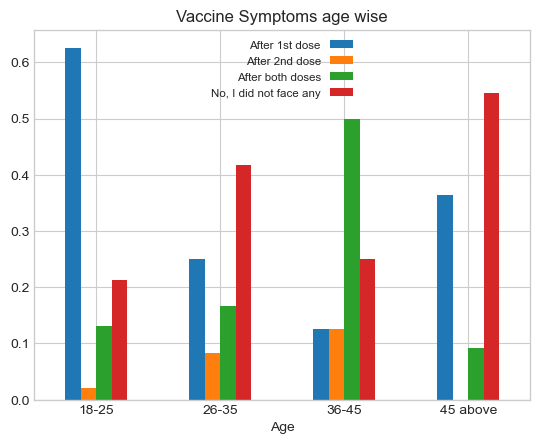

In [25]:
# Vaccine symptoms age-wise

plt.style.use('seaborn-whitegrid')
fig,axis = plt.subplots()
df14 = df_new.groupby(['Age','Vac_symptom'])["Age"].count().unstack('Vac_symptom')
for i in list(df14.columns):
    df14[i]= df14[i]/age_count.Age
df14.plot(kind="bar",ax=axis)
plt.xticks(rotation = 0)
axis.legend(loc=9,frameon=False,fontsize="small",markerfirst=False)
plt.title("Vaccine Symptoms age wise")

## Plot 15

### Vaccine symptoms- age wise and gender wise

Text(0.5, 1.0, 'Vaccine symptoms for a female wrt age')

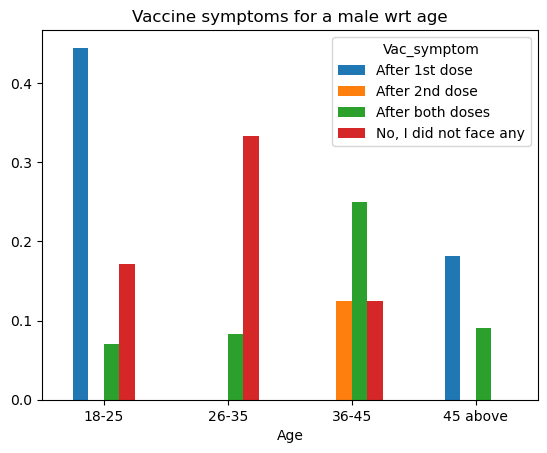

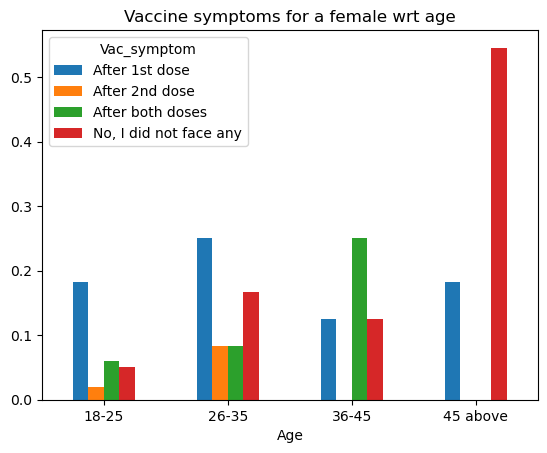

In [26]:
# vaccine symptoms- age wise and gender wise
# male

mpl.style.use('default')
df_male = data[data["Gender"]=="Male"]
df_female = data[data["Gender"]=="Female"]
df15 = df_male.groupby(['Age','Vac_symptom'])["Age"].count().unstack('Vac_symptom')
for i in list(df15.columns):
    df15[i]= df15[i]/age_count.Age
df15.plot.bar()
plt.xticks(rotation=0)
plt.title("Vaccine symptoms for a male wrt age")

# female
df15f = df_female.groupby(['Age','Vac_symptom'])["Age"].count().unstack('Vac_symptom')
for i in list(df15f.columns):
    df15f[i]= df15f[i]/age_count.Age
df15f.plot.bar()
plt.xticks(rotation=0)
plt.title("Vaccine symptoms for a female wrt age")

## Plot 16

### waiting time in queue depending on the living area

Text(0.5, 1.0, 'Waiting time in queue')

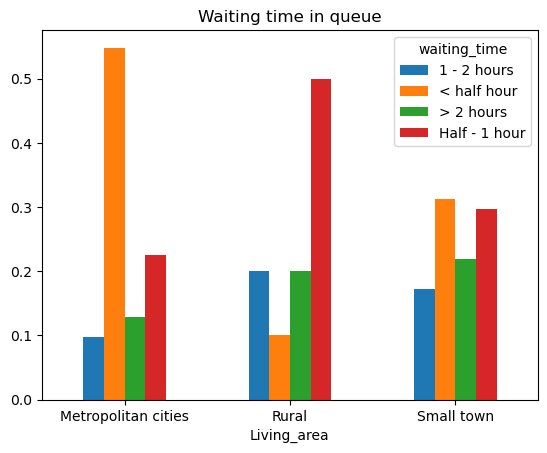

In [27]:
# waiting time in queue wrt to living area

df16 = data[data.Travel=="No"]
travel_no_count =pd.DataFrame(df16["Living_area"].value_counts()) 
df16a = df16.groupby(['waiting_time','Living_area'])["waiting_time"].count().unstack('waiting_time')
for i in list(df16a.columns):
    df16a[i]= df16a[i]/travel_no_count.Living_area
df16a.plot.bar()
plt.xticks(rotation=0)
plt.title("Waiting time in queue")

## Plot 17

### Hygiene maintained in the vaccine providing body wrt living area

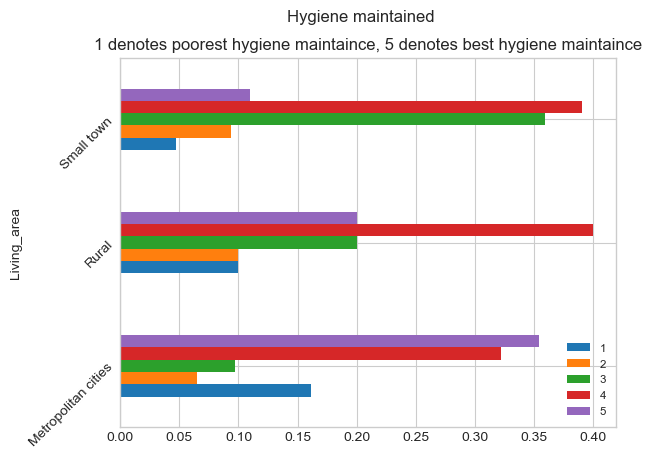

In [28]:
# Hygiene maintained in the vaccine providing body wrt living area

plt.style.use('seaborn-whitegrid')
df17 = df16.groupby(['Hygiene','Living_area'])["Hygiene"].count().unstack('Hygiene')
for i in list(df17.columns):
    df17[i]= df17[i]/travel_no_count.Living_area
df17.plot.barh()
plt.yticks(rotation=45)
plt.suptitle("Hygiene maintained")
plt.title("1 denotes poorest hygiene maintaince, 5 denotes best hygiene maintaince")
plt.legend(frameon = False, fontsize = "small")

## Plot 18

### Social distancing maintained at the vaccine providing body wrt to the living area

(array([0, 1, 2]),
 [Text(0, 0, 'Metropolitan cities'),
  Text(1, 0, 'Rural'),
  Text(2, 0, 'Small town')])

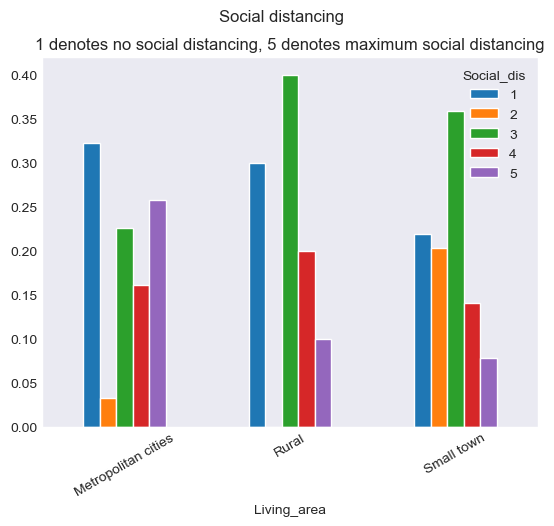

In [29]:
# Social distancing maintained at the vaccine providing body wrt to the living area

sns.set_style("dark")
df18 = df16.groupby(['Social_dis','Living_area'])["Social_dis"].count().unstack('Social_dis')
for i in list(df18.columns):
    df18[i]= df18[i]/travel_no_count.Living_area
df18.plot.bar()
plt.suptitle("Social distancing")
plt.title("1 denotes no social distancing, 5 denotes maximum social distancing")
plt.xticks(rotation=30)

## Plot 19

### Age wise preference of vaccine brand 

In [30]:
data2 = data.copy(deep = True)

In [31]:
data2["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [32]:
data2["Gender"].replace(to_replace = ["Female", "Male"], value = 1, inplace = True)
data2.head()

,TimeStamp,Age,Gender,Living_area,Vac_safe,Vac_status,Travel,1st_choice,2nd_choice,3rd_choice,...,6th_choice,Vac_brand,Vac_reliable,CoWin,Vac_app_easy,waiting_time,Social_dis,Hygiene,Vac_symptom,Govt_effort
0,08-10-2021 00:59,18-25,1,Small town,Yes,Both doses taken,No,Covishield,CoVaxin,Sputnik,...,Moderna,Covishield,Paid vaccines offered by private organizations,"Yes, I faced a lot of issues while booking",3,1 - 2 hours,1,2,After both doses,2
1,18-10-2021 21:38,18-25,1,Small town,Yes,Both doses taken,No,Moderna,Pfizer,Sputnik,...,AstraZeneca,Covishield,Free vaccines offered by the Government,"No, I have not used the portal",4,1 - 2 hours,1,2,After 1st dose,3
2,18-10-2021 21:56,18-25,1,Metropolitan cities,Yes,Both doses taken,Yes,Pfizer,AstraZeneca,Covishield,...,Moderna,Covishield,Free vaccines offered by the Government,"Yes, I faced a lot of issues while booking",2,> 2 hours,3,3,After 1st dose,3
3,18-10-2021 22:29,18-25,1,Small town,Yes,Both doses taken,No,Covishield,CoVaxin,AstraZeneca,...,Moderna,Covishield,Free vaccines offered by the Government,"Yes, I faced a lot of issues while booking",3,> 2 hours,3,3,After 1st dose,4
4,18-10-2021 22:31,18-25,1,Metropolitan cities,Not sure,Both doses taken,No,Covishield,CoVaxin,Sputnik,...,AstraZeneca,CoVaxin,Free vaccines offered by the Government,"Yes, but I did not face any problem",4,< half hour,3,3,After both doses,3


In [33]:
outer1 = data2.groupby(["Age", "1st_choice"]).sum()
outer1 = outer1.drop(["Vac_app_easy", "Social_dis", "Hygiene", "Govt_effort"], axis = 1)
outer1.columns = ["Count"]
outer1

Count
Age      1st_choice        
18-25    AstraZeneca      1
         CoVaxin          8
         Covishield      65
         Moderna          4
         Pfizer          13
         Sputnik          8
26-35    CoVaxin          1
         Covishield       8
         Pfizer           1
         Sputnik          2
36-45    CoVaxin          2
         Covishield       6
45 above CoVaxin          1
         Covishield       7
         Moderna          2
         Sputnik          1

In [34]:
inner1 = data2.groupby("Age").sum()
inner1 = inner1.drop(["Vac_app_easy", "Social_dis", "Hygiene", "Govt_effort"], axis = 1)
inner1.columns = ["Count"]
inner1

,Count
Age,
18-25,99
26-35,12
36-45,8
45 above,11


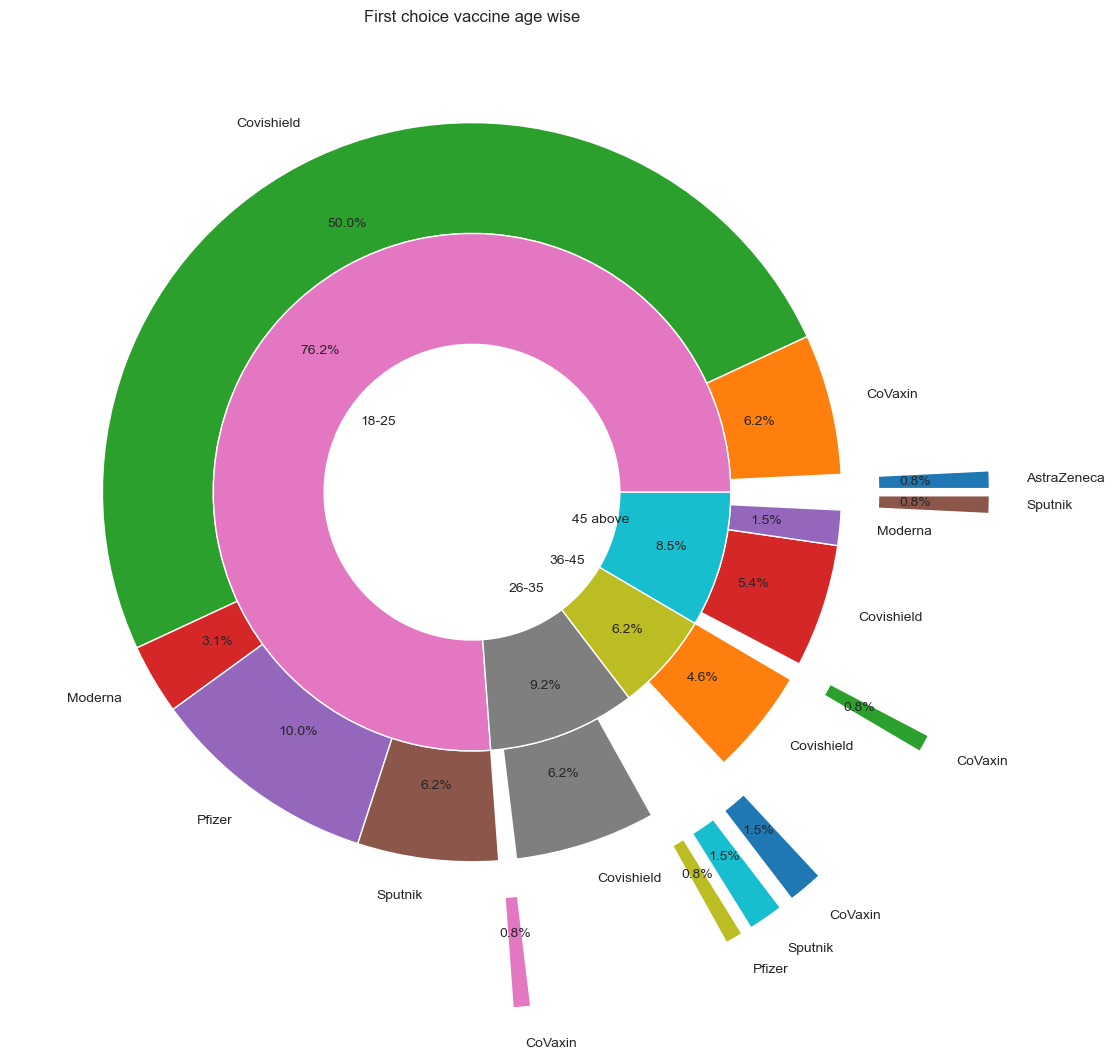

In [35]:
fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer1.values.flatten(), radius=1,
       labels= outer1.index.get_level_values(1),
       autopct='%1.1f%%', pctdistance = 0.8, explode = [0.4,0,0,0,0,0,0.4,0,0.4,0.4,0.4,0,0.4,0,0,0.4],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner1.values.flatten(), radius=1-size, 
       labels = inner1.index, autopct = "%1.1f%%", pctdistance = 0.8, labeldistance = 0.4,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="First choice vaccine age wise")
plt.show()

## Plot 20

### Pie diagram showing the proportion of ratings given to government's effort

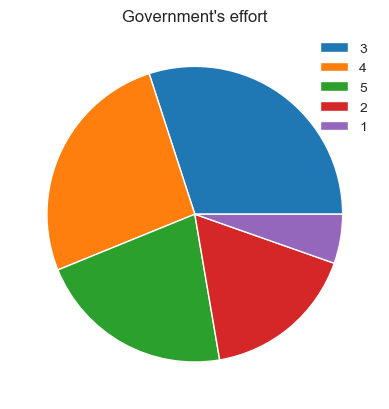

In [36]:
# pie diagram showing the proportion of ratings given to government's effort

pie2, text2 = plt.pie(data.Govt_effort.value_counts())
plt.title("Government's effort")
plt.legend(pie2,data.Govt_effort.value_counts().index)
plt.show()

In [37]:
outer2 = data2.groupby(["Age", "Govt_effort"]).sum()
outer2 = outer2.drop(["Vac_app_easy", "Hygiene", "Social_dis"], axis = 1)
outer2

Gender
Age      Govt_effort        
18-25    1                 6
         2                17
         3                28
         4                28
         5                20
26-35    1                 1
         2                 2
         3                 4
         4                 1
         5                 4
36-45    3                 3
         4                 2
         5                 3
45 above 2                 3
         3                 4
         4                 3
         5                 1

In [38]:
inner2 = data2.groupby("Age").sum()
inner2 = inner2.drop(["Vac_app_easy", "Social_dis", "Hygiene", "Govt_effort"], axis = 1)
inner2.columns = ["Count"]
inner2

,Count
Age,
18-25,99
26-35,12
36-45,8
45 above,11


### Pie donut showing the Government rating wrt age.

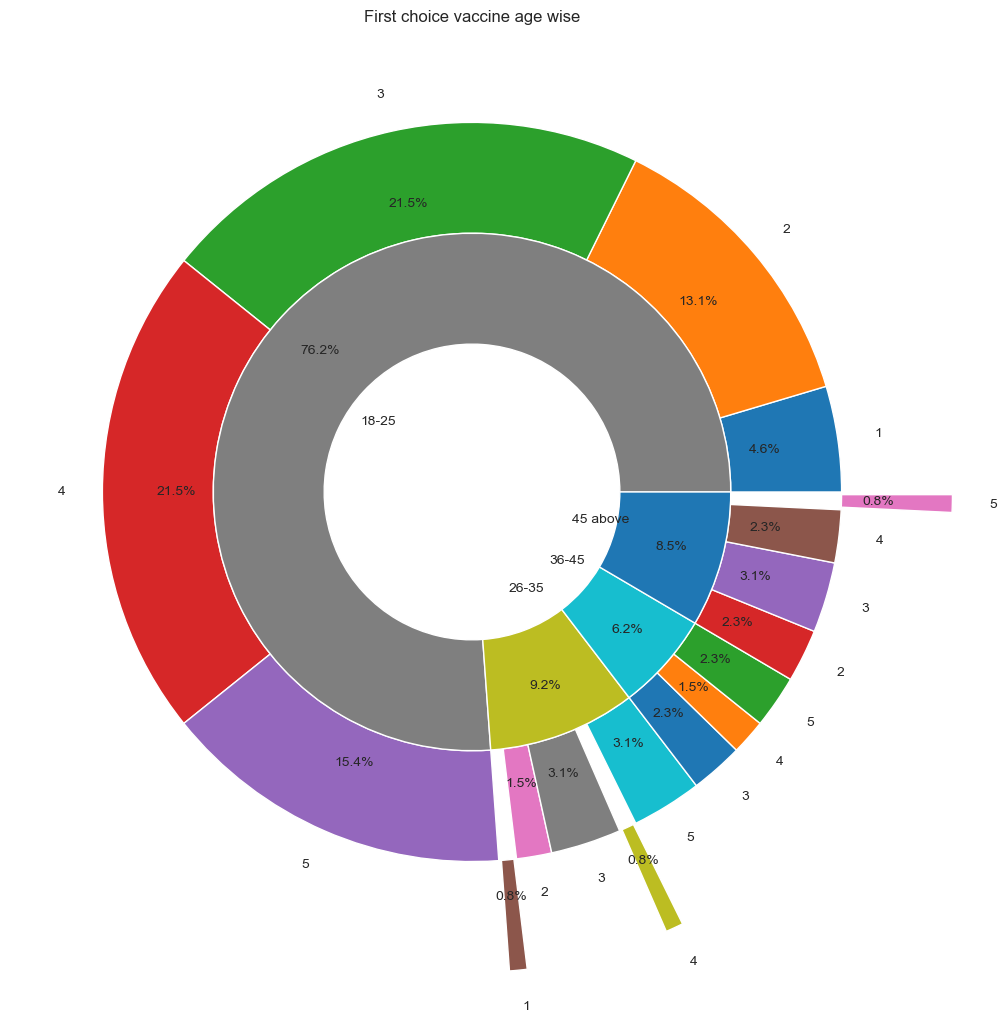

In [39]:
# pie donut showing the Government rating wrt age.

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer2.values.flatten(), radius=1,
       labels= outer2.index.get_level_values(1),
       autopct='%1.1f%%', pctdistance = 0.8, explode = [0,0,0,0,0,0.3,0,0,0.3,0,0,0,0,0,0,0,0.3],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner2.values.flatten(), radius=1-size, 
       labels = inner2.index, autopct = "%1.1f%%", pctdistance = 0.8, labeldistance = 0.4,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="First choice vaccine age wise")
plt.show()

## Plot 21

### Finding the rank Correlation using the heatmap feature in seaborn

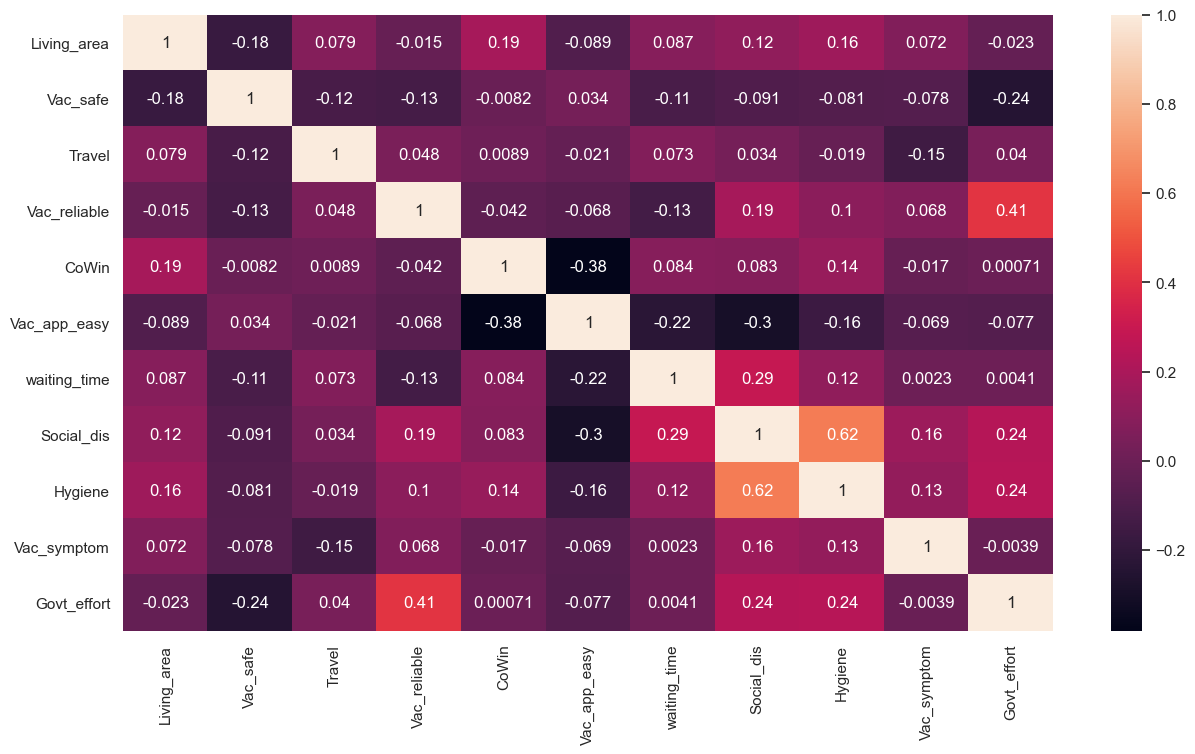

In [40]:
data10 = data.copy()
names = ['Living_area','Vac_safe','Travel','Vac_reliable', 'CoWin',
         'waiting_time','Vac_symptom']
for i in names:
    data10[i] = pd.factorize(data10[i])[0]
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(data10.corr(method="spearman"), annot=True)